# Released by : Khalid OUHMAID & Ayoub BOUBKER


In [1]:
import numpy as np
import sys
np.set_printoptions(np.set_printoptions(threshold=sys.maxsize))
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

##  1. Sur la base de données Mouse


### • Télécharger ce jeu de données et analyser le.

In [2]:
df = pd.read_csv('mouse.txt', sep=" ", header=None, names=["x1", "x2"])

In [3]:
df_c = df.copy()
real_outliers = df_c.iloc[490:]
normal_observations = df_c.iloc[:490]

In [4]:
df_c.head(5)

,x1,x2
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


In [5]:
df_c.shape

(500, 2)

In [6]:
df_c.tail(10)


,x1,x2
490,0.290950,0.855767
491,0.750068,0.897028
492,0.040555,0.507240
493,0.835162,0.138940
494,0.174740,0.363686
495,0.151506,0.876586
496,0.860308,0.633833
497,0.862083,0.591805
498,0.916030,0.523391
499,0.427325,0.833767


In [7]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
df_c.isnull().sum()

x1    0
x2    0
dtype: int64

In [9]:
df_c.describe()

,x1,x2
count,500.000000,500.000000
mean,0.505892,0.599706
std,0.191763,0.156863
min,0.040555,0.138940
25%,0.328481,0.469010
50%,0.504702,0.629494
75%,0.681430,0.735364
max,0.916030,0.897028


###### d'après la variable x1, on peut constater que le min est vraiment loin de la moyenne

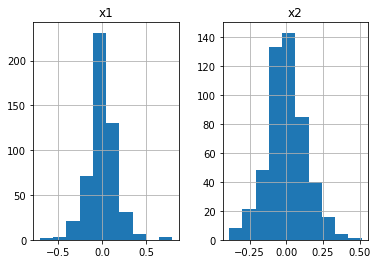

In [10]:
df_c.diff().hist();

### • Donner une représentation graphique des données (matplotlib.pyplot).

<AxesSubplot:>

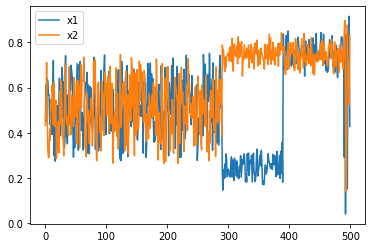

In [11]:
df_c.plot()

<AxesSubplot:xlabel='x1', ylabel='x2'>

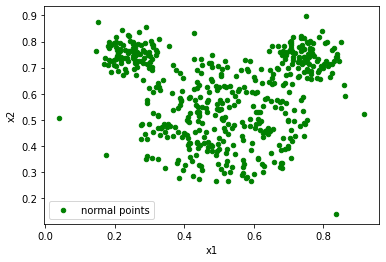

In [12]:
df_c.plot.scatter(x='x1', y='x2',  c='green', s=20,label="normal points")

##### d'après ce plot, on peut constater des outliers qui sont loin du nuage des autres points
###### aucune corrélation entre les 2 variables

(array([1, 2]), [Text(1, 0, 'x1'), Text(2, 0, 'x2')])

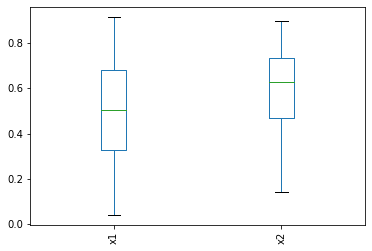

In [13]:
columns = ['x1', 'x2']
df_c[columns].plot.box()
plt.xticks(rotation='vertical')

### • Appliquer la technique Isolation Forest pour détecter les anomalies dans ce jeu de données.

In [14]:
from sklearn.ensemble import IsolationForest
warnings.filterwarnings("ignore", category=DeprecationWarning) 


##### l'idée ici est de predire la globailté de données après l'entrainement du model

In [15]:


model = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.02),random_state=1)

#n_estimators=10, max_samples='auto', contamination=float(.04), max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0,behaviour='new')

model.fit(df_c)

print(model.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.02, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [16]:
X_scores = model.decision_function(df_c)

In [17]:

X_anomaly_score = model.predict(df_c)

X_outliers_score = model.predict(real_outliers)

anomaly_index_ = []
for i in range(len(X_anomaly_score)):
    if X_anomaly_score[i] == -1:
        anomaly_index_.append(i)

anomaly_index_r = []
for i in range(len(X_outliers_score)):
    if X_outliers_score[i] == -1:
        anomaly_index_r.append(i)


In [18]:
print('le nombre des observations considérées comme des ontliers d après la totalité de données :' , len(anomaly_index_))
print('le nombre des observations considérées comme des ontliers et qui sont des réelles outliers :' , len(anomaly_index_r))

le nombre des observations considérées comme des ontliers d après la totalité de données : 10
le nombre des observations considérées comme des ontliers et qui sont des réelles outliers : 7


#### on peut constater que 9 parmi 10 real outliers ont été capté comme des outliers mais d'après la totalité de donnée on trouve qu'il y une grande marge d'erreur

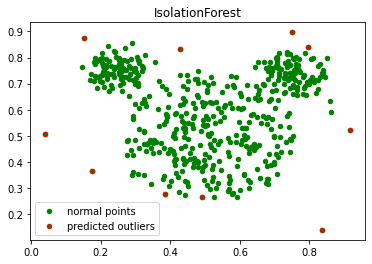

In [19]:
res = df_c
plt.title("IsolationForest")
b1 = plt.scatter(res['x1'], res['x2'], c='green', s=20,label="normal points")
b1 =plt.scatter(res.iloc[anomaly_index_,0],res.iloc[anomaly_index_,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")

### • Modifier votre représentation graphique précédente pour visualiser les données aberrantes.


#### cet plot représente en rouge toutes les obsevations qui sont considéré comme des outliers  

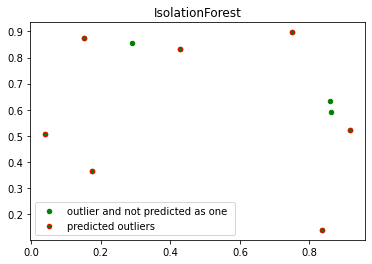

In [20]:
#outliers predictions
res = real_outliers
plt.title("IsolationForest")
b1 = plt.scatter(res['x1'], res['x2'], c='green', s=20,label="outlier and not predicted as one ")
b1 =plt.scatter(res.iloc[anomaly_index_r,0],res.iloc[anomaly_index_r,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")

#### ce plot représente les outliers qui sont outliers et predicted des outliers en rouge et en vert qui sont der real outliers et ne sont pas prédit comme des outliers

In [21]:
print("Accuracy:", list(X_anomaly_score).count(1)/X_anomaly_score.shape[0])

Accuracy: 0.98


#### ce plot représente le jeu de données après la suppression fr toutes les observations qui ont été prédites comme des outliers : 


In [22]:
df_cc = df_c.drop([i for i in anomaly_index_])

<AxesSubplot:xlabel='x1', ylabel='x2'>

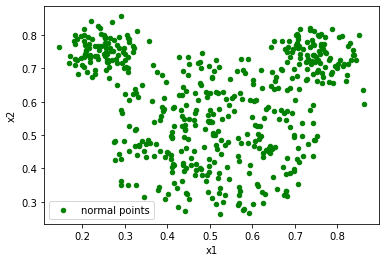

In [23]:
df_cc.plot.scatter(x='x1', y='x2',  c='green', s=20,label="normal points")

#### dans cette partie on a essyer de répartir les données (test et train)
    #### 70% des données réellement ne sont pas des outliers  + 70% des observations qui sont réellemnt des outliers 

In [24]:
from sklearn.model_selection import train_test_split
Xtr_n, Xts_n = train_test_split(normal_observations, train_size=0.7, random_state=1)
Xtr_o, Xts_o = train_test_split(real_outliers, train_size=0.7, random_state=1)

In [25]:
X_train = pd.concat([Xtr_n, Xtr_o], ignore_index=True)
X_test = pd.concat([Xts_n, Xts_o], ignore_index=True)

<AxesSubplot:xlabel='x1', ylabel='x2'>

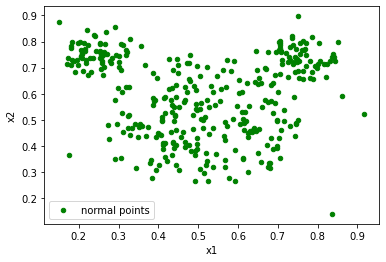

In [26]:
X_train.plot.scatter(x='x1', y='x2',  c='green', s=20,label="normal points")

In [27]:
model_sp = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=1)

model_sp.fit(X_train)

print(model_sp.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [28]:
X_train_scores = model_sp.decision_function(X_train)
X_test_scores = model_sp.decision_function(X_test)


In [29]:
X_train_anomaly_score = model_sp.predict(X_train)
X_test_anomaly_score = model_sp.predict(X_test)
X_outliers_score = model_sp.predict(real_outliers)

In [30]:
#anomaly_index_sp : pour les données train
anomaly_index_sp = []
for i in range(len(X_train_anomaly_score)):
    if X_train_anomaly_score[i] == -1:
        anomaly_index_sp.append(i)

#anomaly_index_sp_s : pour les données test
anomaly_index_sp_s = []
for i in range(len(X_test_anomaly_score)):
    if X_test_anomaly_score[i] == -1:
        anomaly_index_sp_s.append(i)

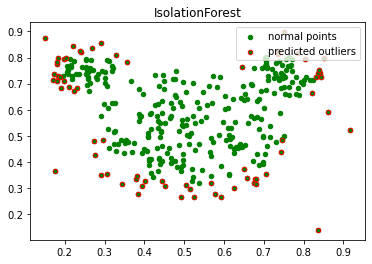

In [31]:
#prediction des données train
ress = X_train
plt.title("IsolationForest")
b1 = plt.scatter(ress['x1'], ress['x2'], c='green', s=20,label="normal points")
b1 =plt.scatter(ress.iloc[anomaly_index_sp,0],ress.iloc[anomaly_index_sp,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")

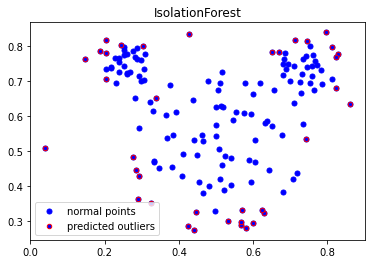

In [32]:
#prediction des données test
ress = X_test
plt.title("IsolationForest")
b1 = plt.scatter(ress['x1'], ress['x2'], c='blue', s=25,label="normal points")
b1 =plt.scatter(ress.iloc[anomaly_index_sp_s,0],ress.iloc[anomaly_index_sp_s,1], c='blue',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")

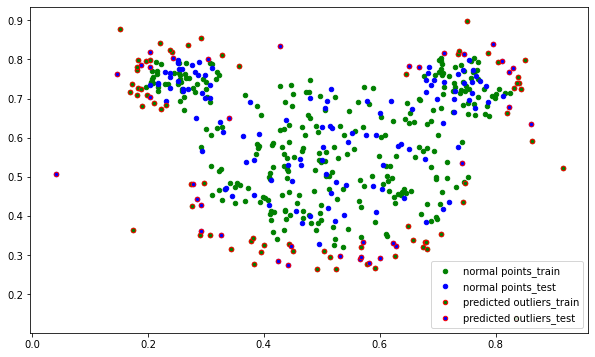

In [33]:
#combiane prediction des données train et données test
ress = X_train
resss = X_test
b1 = plt.subplots(figsize=(10, 6))
b1 = plt.scatter(ress['x1'], ress['x2'], c='green', s=20,label="normal points_train")
b1 = plt.scatter(resss['x1'], resss['x2'], c='blue', s=20,label="normal points_test")
b1 = plt.scatter(ress.iloc[anomaly_index_sp,0],ress.iloc[anomaly_index_sp,1], c='green',s=20,  edgecolor="red",label="predicted outliers_train")
b1 = plt.scatter(resss.iloc[anomaly_index_sp_s,0],resss.iloc[anomaly_index_sp_s,1], c='blue',s=20,  edgecolor="red",label="predicted outliers_test")
plt.legend(loc="lower right")


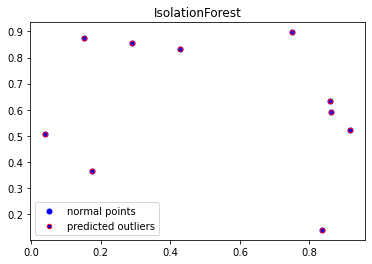

In [34]:
#prediction des données qui des real outliers
anomaly_index_realoutliers = []
for i in range(len(X_outliers_score)):
    if X_outliers_score[i] == -1:
        anomaly_index_realoutliers.append(i)

ress = real_outliers
plt.title("IsolationForest")
b1 = plt.scatter(ress['x1'], ress['x2'], c='blue', s=25,label="normal points")
b1 =plt.scatter(ress.iloc[anomaly_index_realoutliers,0],ress.iloc[anomaly_index_realoutliers,1], c='blue',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")

In [35]:
print("Accuracy:", list(X_test_anomaly_score).count(1)/X_test_anomaly_score.shape[0])

Accuracy: 0.7533333333333333


## 2. Sur le jeu de données des cartes de crédits

### • Préparer ce jeu de données (ne pas utiliser la variable Time)

In [61]:
df2 = pd.read_csv('creditcard.csv', sep=',')

In [62]:
df2_c = df2.copy()

In [63]:
df2_c.shape

(284807, 31)

In [64]:
df2_c.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
df2_c = df2_c.drop(['Time'], axis=1)

In [66]:
df2_c.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
df2_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

#### aucune missing value, 29 variables(des float) et une variable de sortie(int)

In [68]:
df2_c.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
class_names = {0:'Not Fraud', 1:'Fraud'}
rvs = df2_c.Class.value_counts().rename(index = class_names)
print(rvs)

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


In [70]:
df2_c.loc[:,'Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<AxesSubplot:title={'center':'Distribution of Amount Feature'}, xlabel='Amount', ylabel='Density'>

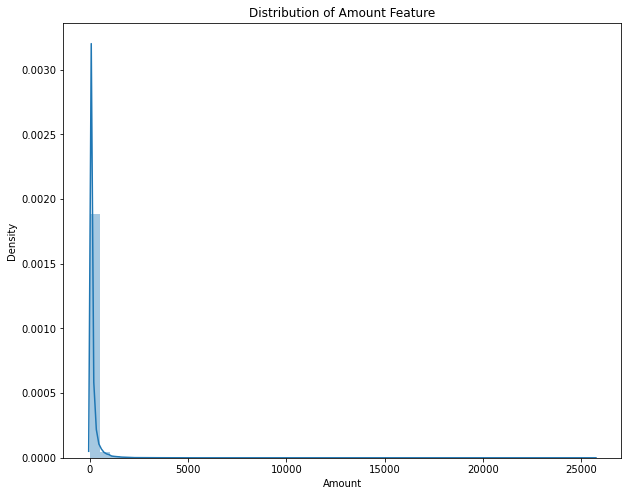

In [71]:
plt.figure(figsize = (10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(df2_c.Amount)

#### le montant moyen des transactions est 88 or la transaction maximale est 25700 

In [72]:
#s0 = df2_c.Class[df2_c.Class.eq(0)].sample(5000,replace=True).index
#s1 = df2_c.Class[df2_c.Class.eq(1)].sample(frac =1).index 

#df2_c = df2_c.loc[s0.union(s1)]

#df2_c.shape

In [73]:
#class_names = {0:'Not Fraud', 1:'Fraud'}
#rvs = df2_c.Class.value_counts().rename(index = class_names)
#print(rvs)

Text(0.5, 0, 'Class (0:Not-Fraud, 1:Fraud)')

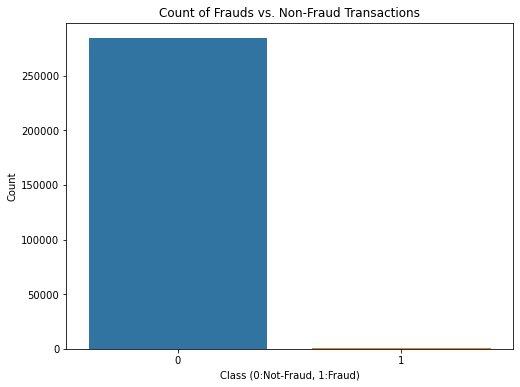

In [74]:
counts = df2_c.Class.value_counts()
plt.figure(figsize = (8,6))
sns.barplot(x = counts.index, y = counts)
plt.title('Count of Frauds vs. Non-Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Not-Fraud, 1:Fraud)')

#### la var Montant doit etre standarisé (n a pas le meme scale)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_amount = scaler.fit_transform(df2_c[['Amount']])
flat_list = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list)

In [76]:
#concatenation du var "amount" standarisé avec notre dataframe et suppression de l'ancienne "Amount"

df2_c = pd.concat([df2_c, scaled_amount.rename('scaled_amount')], axis=1)
df2_c.drop(['Amount'], axis=1, inplace=True)
df2_c.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


####  X1 et y1 : les données sont traitées d'une manière totales
#### X2 et y2 : le données seront traitées avec le split : train et test

In [77]:
y1 = df2_c["Class"]
X1 = df2_c.loc[:, df2_c.columns != 'Class']

### • Appliquer la technique Isolation Forest pour détecter les anomalies dans votre jeu de données.


In [78]:

model2 = IsolationForest(n_estimators=500, max_samples='auto', 
                          contamination=0.00172, max_features=28, 
                          bootstrap=False, random_state=1)

model2.fit(X1)

print(model2.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.00172, 'max_features': 28, 'max_samples': 'auto', 'n_estimators': 500, 'n_jobs': None, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [79]:
X_scores = model2.decision_function(X1)


In [80]:
X_anomaly_score = model2.predict(X1)


In [81]:
i = 0
for i in range(len(X_anomaly_score)):
    if X_anomaly_score[i] == -1:
        X_anomaly_score[i] = 1
    else:
        X_anomaly_score[i] = 0

In [82]:
anomaly_index = []
for i in range(len(X_anomaly_score)):
    if X_anomaly_score[i] == 1:
        anomaly_index.append(i)
print('le nombre des observations considérées comme des ontiliers  :' , len(anomaly_index))

le nombre des observations considérées comme des ontiliers  : 490


### • Retourner la matrice de confusion et analyser les instances aberrantes détectées.

[[283959    356]
 [   358    134]]


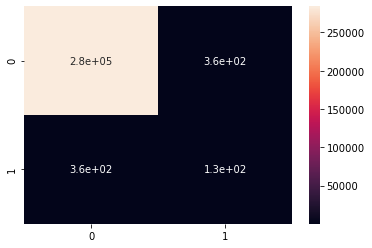

In [83]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y1, X_anomaly_score)
print(cm)
sns.heatmap(cm, annot = True);

#### Notre prob consiste à capter les outliers (les fraudes), et puisque le probleme est lié à l'argent, donc il est préférable de considerer des transactions qui ne sont pas frauduleuses comme des outliers et les vérifier et de ne pas laisser passer les transactions qui sont vraiment fraduleuses 

#### le problème consiste à minimiser les False negatives, d'apès la matrice de confusion, d'après la matrice de confusion on trouve que 
#### le nombre des FN est un peu élevé, mais le problème qu'on peut constater et il demande une réaction c'est les TP(138), on a seul 138 transactions frauduleuses qui étaient capter du 492 fraudes.

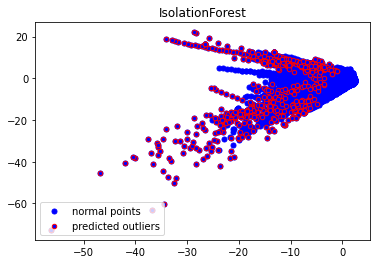

In [84]:

ress = X1
plt.title("IsolationForest")
b1 = plt.scatter(ress['V1'], ress['V2'], c='blue', s=25,label="normal points")
b1 =plt.scatter(ress.iloc[anomaly_index,0],ress.iloc[anomaly_index,1], c='blue',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")

#### Le split des données 

In [85]:
from sklearn.model_selection import train_test_split

y2 = df2_c["Class"]
X2 = df2_c.loc[:, df2_c.columns != 'Class']
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=1/5, random_state=42)

In [86]:
model3 = IsolationForest(n_estimators=500, max_samples='auto', 
                          contamination=0.00172, max_features=28, 
                          bootstrap=False, random_state=1)

model3.fit(X_train)

print(model3.get_params())

{'behaviour': 'deprecated', 'bootstrap': False, 'contamination': 0.00172, 'max_features': 28, 'max_samples': 'auto', 'n_estimators': 500, 'n_jobs': None, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [87]:
# confusion matrix liée aux données train

X_anomaly_score2 = model3.predict(X_train)
i = 0
for i in range(len(X_anomaly_score2)):
    if X_anomaly_score2[i] == -1:
        X_anomaly_score2[i] = 1
    else:
        X_anomaly_score2[i] = 0
        

In [88]:
anomaly_index_tr = []
for i in range(len(X_anomaly_score2)):
    if X_anomaly_score2[i] == 1:
        anomaly_index_tr.append(i)
print('le nombre des observations considérées comme des ontiliers  :' , len(anomaly_index_tr))

le nombre des observations considérées comme des ontiliers  : 392


[[227160    291]
 [   293    101]]


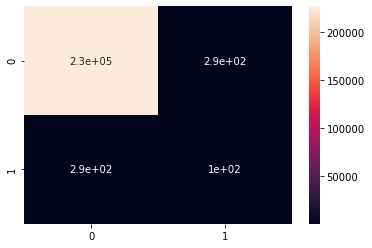

In [89]:
cm = confusion_matrix(y_train, X_anomaly_score2)
print(cm)
sns.heatmap(cm, annot = True);

In [90]:
y_train.value_counts()

0    227451
1       394
Name: Class, dtype: int64

#### le prb insiste à minimiser les FN, d'parès la matrice de confusion on trouve que le FN est élevé qui est grave, et que les TN ne présente mm pas 28% desreals fraudes

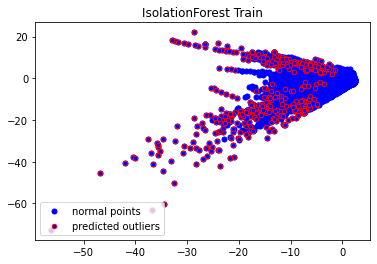

In [91]:
ress = X_train
plt.title("IsolationForest Train")
b1 = plt.scatter(ress['V1'], ress['V2'], c='blue', s=25,label="normal points")
b1 =plt.scatter(ress.iloc[anomaly_index_tr,0],ress.iloc[anomaly_index_tr,1], c='blue',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")

[[56797    67]
 [   71    27]]


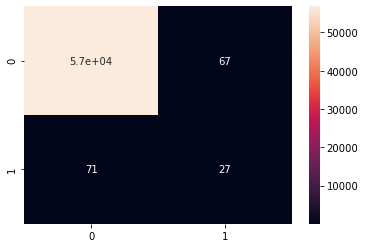

In [92]:
# confusion matrix liée aux données test

X_anomaly_score2_test = model3.predict(X_test)
i = 0
for i in range(len(X_anomaly_score2_test)):
    if X_anomaly_score2_test[i] == -1:
        X_anomaly_score2_test[i] = 1
    else:
        X_anomaly_score2_test[i] = 0
        
cm = confusion_matrix(y_test, X_anomaly_score2_test)
print(cm)
sns.heatmap(cm, annot = True);



In [93]:
y_test.value_counts()

0    56864
1       98
Name: Class, dtype: int64

#### le mm problème, Notre FN est élevé, et les TN représente que 32% des reals fraudes 

In [94]:
anomaly_index_ts = []
for i in range(len(X_anomaly_score2_test)):
    if X_anomaly_score2_test[i] == 1:
        anomaly_index_ts.append(i)
print('le nombre des observations considérées comme des ontiliers  :' , len(anomaly_index_ts))

le nombre des observations considérées comme des ontiliers  : 94


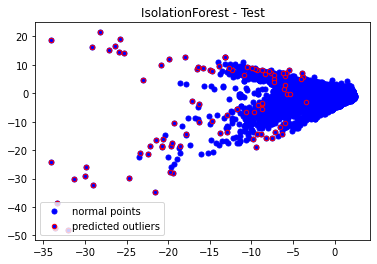

In [95]:
ress = X_test
plt.title("IsolationForest - Test")
b1 = plt.scatter(ress['V1'], ress['V2'], c='blue', s=25,label="normal points")
b1 =plt.scatter(ress.iloc[anomaly_index_ts,0],ress.iloc[anomaly_index_ts,1], c='blue',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="lower left")